# Unsuperived Learning (K-Means Algorithm)

Group similar flowers without using labels, based on their features.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("c:/users/sakshi yadav/Downloads/Iris_dataset.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
print("The number of cluster: ",len(df.Species.unique()))

The number of cluster:  3


In [6]:
df = df.drop(columns=['Id', 'Species'])

In [7]:
df.shape

(150, 4)

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(3)

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(147, 4)

In [12]:
from sklearn.cluster import KMeans

In [13]:
kn = KMeans(n_clusters = 3, random_state = 11)

In [14]:
df['Cluster'] = kn.fit_predict(df)

In [15]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
df.Cluster.unique()

array([0, 1, 2], dtype=int32)

In [17]:
from sklearn.decomposition import PCA

In [18]:
df_pca = PCA(n_components = 2).fit_transform(df)

In [19]:
df_pca[:5]

array([[-2.91097074e+00, -3.73307320e-01],
       [-2.93376883e+00, -8.05297217e-02],
       [-3.10208340e+00, -6.41519610e-02],
       [-2.96241475e+00, -1.12965313e-03],
       [-2.95397485e+00, -3.70568946e-01]])

In [20]:
# PCA - Principal Component Analysis

In [21]:
df['pca1'] = df_pca[ : , 0]

In [22]:
df['pca2'] = df_pca[ : , 1]

In [23]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster,pca1,pca2
0,5.1,3.5,1.4,0.2,0,-2.910971,-0.373307
1,4.9,3.0,1.4,0.2,0,-2.933769,-0.080530
2,4.7,3.2,1.3,0.2,0,-3.102083,-0.064152
3,4.6,3.1,1.5,0.2,0,-2.962415,-0.001130
4,5.0,3.6,1.4,0.2,0,-2.953975,-0.370569


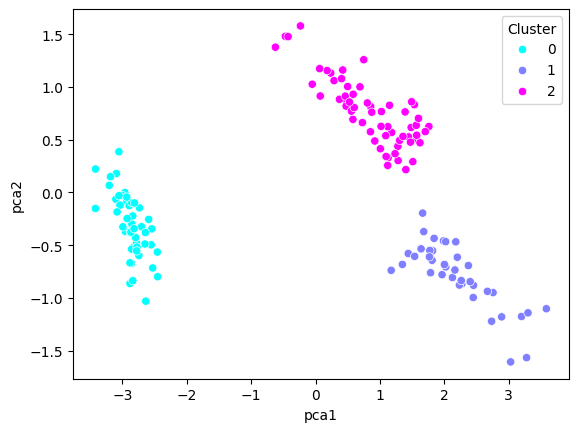

In [24]:
sns.scatterplot(x=df['pca1'], y=df['pca2'], data=df, palette='cool', hue='Cluster')
plt.show()